In [1]:

import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.cm as cm
import matplotlib.patches as patches

In [2]:

class Point:
    def __init__(self):
        self.x = None
        self.y = None
        self.z = None

        self.id = None

In [66]:

def ReadXYZFile(filedir, partition = " "):
    points = []
    point_size = 0
    with open(filedir, "r") as f:
        line_num = 0
        for line in f:
            if line_num == 0:
                point_size = int(line)
                print(point_size)
                #points = [Point() for i in range(point_size)]
                line_num = line_num + 1
            else:
                items = line.split(partition)
                p = Point()
                p.x = float(items[0])
                p.y = float(items[1])
                p.z = float(items[2])
                p.id = int(items[3])
                #points[line_num-1] = p
                points.append(p)
                line_num = line_num + 1
                
    return(points)




In [67]:
def GetClusterNum(points):
    max_cluster_id = 0
    for p in points:
        if p.id > max_cluster_id:
            max_cluster_id = p.id

    return(max_cluster_id)

In [68]:
db_points = []
db_points= ReadXYZFile("sample_pcl_th2m_result.xyz")

print(len(db_points))

id = 0
for p in db_points:
    print(id,":(", p.x, ",", p.y, ",", p.z,") :: ", p.id)
    id = id + 1


db_cluster_num = GetClusterNum(db_points)
db_cluster_num



40
40
0 :( 1.0 , 1.0 , 0.0 ) ::  1
1 :( 1.0 , 0.5 , 0.0 ) ::  1
2 :( 0.5 , 1.0 , 0.0 ) ::  1
3 :( 1.0 , 1.5 , 0.0 ) ::  1
4 :( 3.0 , 3.0 , 0.0 ) ::  2
5 :( 3.0 , 3.5 , 0.0 ) ::  2
6 :( 3.5 , 3.0 , 0.0 ) ::  2
7 :( 3.5 , 3.5 , 0.0 ) ::  2
8 :( 3.0 , 5.0 , 0.0 ) ::  2
9 :( 3.0 , 5.5 , 0.0 ) ::  2
10 :( 3.5 , 5.0 , 0.0 ) ::  2
11 :( 3.5 , 5.5 , 0.0 ) ::  2
12 :( 10.0 , 10.0 , 0.0 ) ::  4
13 :( 10.0 , 10.5 , 0.0 ) ::  4
14 :( 10.5 , 10.0 , 0.0 ) ::  4
15 :( 10.5 , 10.5 , 0.0 ) ::  4
16 :( 15.0 , 15.0 , 0.0 ) ::  6
17 :( 15.0 , 15.5 , 0.0 ) ::  6
18 :( 15.5 , 15.0 , 0.0 ) ::  6
19 :( 15.5 , 15.5 , 0.0 ) ::  6
20 :( 0.0 , 15.0 , 0.0 ) ::  3
21 :( 0.0 , 15.5 , 0.0 ) ::  3
22 :( 0.5 , 14.0 , 0.0 ) ::  3
23 :( 0.5 , 13.0 , 0.0 ) ::  3
24 :( 10.0 , 10.0 , 0.0 ) ::  4
25 :( 10.0 , 11.5 , 0.0 ) ::  4
26 :( 10.0 , 9.0 , 0.0 ) ::  4
27 :( 10.0 , 8.0 , 0.0 ) ::  4
28 :( 4.0 , 3.0 , 0.0 ) ::  2
29 :( 5.0 , 3.5 , 0.0 ) ::  2
30 :( 4.5 , 2.5 , 0.0 ) ::  2
31 :( 5.5 , 3.0 , 0.0 ) ::  2
32 :( 15.0 , 5.0 ,

6

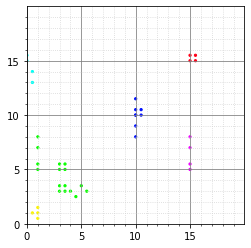

In [69]:

x = []
y = []
cluster = []
#cluster_size = db.GetClusterSize()
cluster_size = db_cluster_num
for p in db_points:
    x.append(p.x)
    y.append(p.y)
    cluster.append(p.id / cluster_size)

cluster
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, color = cm.hsv(cluster), s = 5)
max_x = 20
max_y = 20
ax.set_xlim(0,max_x)
ax.set_ylim(0,max_y)

x_minor_ticks = np.arange(0,max_x,1)
x_major_ticks = np.arange(0,max_x,5)
y_minor_ticks = np.arange(0,max_y,1)
y_major_ticks = np.arange(0,max_y,5)

ax.set_xticks(x_minor_ticks, minor=True)
ax.set_xticks(x_major_ticks, minor=False)
ax.set_yticks(y_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks, minor=False)

ax.grid(which="major", color="gray", linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="dotted")
ax.set_aspect('equal')